In [727]:
import numpy as np
import abc


# 1


In [728]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Initialization techniques of weights here defined
class WeightInitialization(metaclass=abc.ABCMeta):

    @abc.abstractmethod
    def init(self, lower, upper, shape):
        pass

class UniformDistributionWeight(WeightInitialization):

    def init(self, lower, upper, shape):
        return np.random.uniform(lower, upper, size=shape)

In [729]:
weights = UniformDistributionWeight().init(1, 1, 9)
weights 

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [730]:
# constant
nodes_per_layer = [2,2,1]
bias_value = 1


def get_nr_weights(nodes_per_layer):

    nr_weights = 0

    for idx in range(len(nodes_per_layer) - 1):
        current_layer = nodes_per_layer[idx]
        next_layer = nodes_per_layer[idx + 1]

        nr_weights = nr_weights + (current_layer + 1) * next_layer

    return nr_weights


weights = UniformDistributionWeight().init(-1, 1, get_nr_weights(nodes_per_layer))
print(weights)

    

[ 0.82210855  0.06458423  0.6595535   0.22464409  0.46313965 -0.64861704
  0.5143191  -0.17137607  0.53678562]


In [731]:
def divide_in_layers_matrix(weights, nodes_per_layer):

    layers = []
    last = 0
    for idx in range(len(nodes_per_layer) - 1):
        
        current_layer = nodes_per_layer[idx]
        next_layer = nodes_per_layer[idx + 1]
        temp = (current_layer + 1) * next_layer
        layers.append(weights[last : last + temp].reshape(current_layer + 1, next_layer))
        #print("{}:{}".format(last, last + temp))
        last = temp

    return layers

divide_in_layers_matrix(weights, nodes_per_layer)


[array([[ 0.82210855,  0.06458423],
        [ 0.6595535 ,  0.22464409],
        [ 0.46313965, -0.64861704]]),
 array([[ 0.5143191 ],
        [-0.17137607],
        [ 0.53678562]])]

In [732]:

def forward_pass(x1, x2 , weights):
    input_layer = np.array([x1, x2])
    values_output = [[x1, x2, bias_value]]
    values_net = [[]]
    for idx in range(len(weights)):
        weight = weights[idx]
        input_layer = np.append(input_layer, [bias_value])
        net = np.dot(input_layer, weight)
        output = sigmoid(net)
        values_net.append(net)
        values_output.append(output)
        input_layer = output

    #values_input.append(input_layer)
    return values_output ,values_net


forward_pass(1, 0, divide_in_layers_matrix(weights, nodes_per_layer))

([[1, 0, 1], array([0.78334181, 0.35800517]), array([0.70647391])],
 [[], array([ 1.2852482 , -0.58403281]), array([0.87831976])])

# 2


In [733]:
values_output = []
values_input = []

def mse(weights):

    inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
    expected_output = np.array([[0],[1],[1],[0]])
    predicted = []
    values_output = []
    values_net = []
    for possible_inputs in inputs:
        val, net= forward_pass(possible_inputs[0], possible_inputs[1], divide_in_layers_matrix(weights, nodes_per_layer))
        predicted.append(val[-1][0])
        values_output.append(val)
        values_net.append(net)
        #print(val)
    
    predicted = np.array(predicted)

    error = expected_output - predicted
    error = error * error
    #print(error)
    return np.mean(error), expected_output , values_output, values_net

print(mse(weights))

(0.2912361609417517, array([[0],
       [1],
       [1],
       [0]]), [[[0, 0, 1], array([0.61375872, 0.34330125]), array([0.68860805])], [[0, 1, 1], array([0.75448793, 0.39556645]), array([0.70204239])], [[1, 0, 1], array([0.78334181, 0.35800517]), array([0.70647391])], [[1, 1, 1], array([0.87487871, 0.41110755]), array([0.71428729])]], [[[], array([ 0.46313965, -0.64861704]), array([0.79361984])], [[], array([ 1.12269315, -0.42397295]), array([0.85704255])], [[], array([ 1.2852482 , -0.58403281]), array([0.87831976])], [[], array([ 1.94480169, -0.35938872]), array([0.91629846])]])


# 3

In [734]:
def sigmoid_derivative(x):
    return x * (1 - x)

In [735]:
def grdmse(weights):
    mse_value, y, outputs =  mse(weights) # returns for the four different inputs
    w = divide_in_layers_matrix(weights, nodes_per_layer)


    # for the first example
    output = outputs[0] # output first layer, output second layer, ..., output last layer
    target = y[0]

    layerK = len(nodes_per_layer)-1

    ######## gradient for the weights between layer n-1 and n #################
    delta_j =  (output[layerK] - target) * sigmoid_derivative(output[layerK]) # (y - d) * derivative
    print(np.array(output[layerK]).T.dot(delta_j))
    
    layerK = layerK - 1
    ############### get other gradient through back propagations ###############
    while layerK > 0:
        
        #delta_k = delta_j
        delta_j = np.dot(delta_j, w[layerK].T)
        delta_j =  sigmoid_derivative(np.array(output[layerK])) * delta_j
        print(np.array(output[layerK]).T.dot(delta_j))
        layerK = layerK - 1
    
    
    #print(gradients)



grdmse(weights)
    

ValueError: too many values to unpack (expected 3)

In [ ]:
import random
errors = []
def grdmse(weights):
    #print(weights)
    mse_value, y, outputs ,values_net =  mse(weights) # returns for the four different inputs
    w = divide_in_layers_matrix(weights, nodes_per_layer)
    #print(values_net)
    #print(outputs)
    # for the first example
    #output = outputs[0] # output first layer, output second layer, ..., output last layer
    #target = y[0]
    rnd = random.randrange(4)
    output = outputs[rnd]
    net = values_net[rnd]
    target = y[rnd]
    errors.append(abs(target[0] - output[2][0]))
    #print(target[0] , output[2][0])
    print(net)
    layerK = len(nodes_per_layer)-1
    ######## gradient for the weights between layer n-1 and n #################
    #print(sigmoid_derivative(w[layerK-1]))
    #print(values_net)
    delta_j =  (target - output[layerK]) * sigmoid_derivative(net[layerK]) # (y - d) * derivative)
    delta_j = delta_j * [*output[layerK - 1],1]

    #print(output[layerK - 1])
    delta_i = np.empty([2,3])
    for i in range(2):
        for j in range(3):
            delta_i[i,j] = delta_j[j] * sigmoid_derivative(net[layerK - 1][i]) * output[layerK - 2][i]
    delta_weights = np.append(delta_i.transpose().flatten(),delta_j)
    #print(delta_j)
    #print(delta_i)
    weights -= 0.001 * delta_weights


#grdmse(weights)
for i in range(1000):
    grdmse(weights)

[[], array([-1.06025367,  1.11076001]), array([-0.28614573])]
[[], array([-1.06083084,  1.11076001]), array([-0.2858156])]
[[], array([-0.08705784,  0.99021332]), array([-0.25996578])]
[[], array([-0.08705784,  0.99021332]), array([-0.26021682])]
[[], array([-0.04804798,  1.30382231]), array([-0.2585461])]
[[], array([-1.0223977 ,  1.42420356]), array([-0.284026])]
[[], array([-1.02172714,  1.42439949]), array([-0.28427968])]
[[], array([-1.02105656,  1.42459574]), array([-0.28453364])]
[[], array([-0.08608632,  0.9904249 ]), array([-0.26091378])]
[[], array([-0.08608632,  0.9904249 ]), array([-0.26116583])]
[[], array([-0.04629339,  1.30420585]), array([-0.2595001])]
[[], array([-0.04629339,  1.30407507]), array([-0.25915773])]
[[], array([-0.04629339,  1.30394459]), array([-0.25881596])]
[[], array([-1.06017888,  1.11068522]), array([-0.28593793])]
[[], array([-0.0865449 ,  0.99020579]), array([-0.26008255])]
[[], array([-0.04709694,  1.30381441]), array([-0.25839551])]
[[], array([-

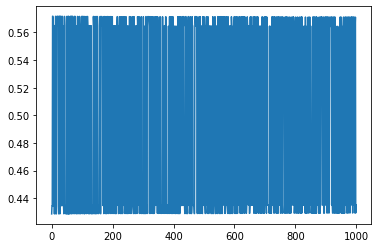

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(errors)),errors)

In [ ]:
import random
errors = []
def grdmse(weights):
    #print(weights)
    mse_value, y, outputs ,values_net =  mse(weights) # returns for the four different inputs
    w = divide_in_layers_matrix(weights, nodes_per_layer)
    #print(values_net)
    #print(outputs)
    # for the first example
    #output = outputs[0] # output first layer, output second layer, ..., output last layer
    #target = y[0]
    rnd = random.randrange(4)
    output = outputs[2]
    net = values_net[2]
    target = y[2]
    errors.append(abs(target[0] - output[2][0]))
    #print(target[0] , output[2][0])
    #print(net)
    ######## gradient for the weights between layer n-1 and n #################
    #print(sigmoid_derivative(w[layerK-1]))
    #print(values_net)
    layer2_delta =  (target - output[2]) * sigmoid_derivative(output[2]) # (y - d) * derivative)
    layer1_error = np.dot(layer2_delta, w[1].T)
    print(layer1_error)
    layer1_delta = layer1_error.T * sigmoid_derivative(np.array([*output[1],1]))
    
    delta_1 = np.dot(np.array(output[0]).T, layer1_delta)
    delta_2 = np.dot(np.array(output[1]).T, layer2_delta)



grdmse(weights)


[ 0.01689048  0.00341546 -0.04328597]


ValueError: shapes (2,) and (1,) not aligned: 2 (dim 0) != 1 (dim 0)

In [ ]:
import random
def magic(x1, x2 , weights):

    input_layer = np.array([x1, x2])
    weights =  divide_in_layers_matrix(weights, nodes_per_layer)
    #print(weights)

    inputs = []
    nets = []
    
    #forward pass
    for idx in range(len(weights)):
        input_layer = np.append(input_layer, [bias_value])
        inputs.append(input_layer)
        weight = weights[idx]
        net = np.dot(input_layer, weight)
        nets.append(net)
        output = sigmoid(net)
        input_layer = output # the input of the next layer is the output of the current

    inputs = np.array(inputs)
    length = len(inputs) - 1
        
    print(output[0], ' : ', x1,',',x2)
    #print('dif: ',output[0] - (x1 != x2))
    #backward pass
    delta =np.array([np.array(output-(x1 != x2)) * sigmoid_derivative(nets[1])])
    delta_output = delta * inputs[length].reshape(-1,1).transpose()
    #print(delta)
    print("DW for second weights:\n",delta_output)
    length -=1

    print(nets[length])
    a = sigmoid_derivative(np.array(nets[length])).reshape(1, len(inputs[0]))
    # a = [a[0][:-1]]
    some = delta *  weights[1][:-1].dot(a)
    print('some\n', some)
    #print(some)
    delta_hidden = np.multiply(some, inputs[0][:, np.newaxis])
    #print("DW for first weights:")
    print("DW for first weights:\n",delta_hidden)
    delta_weights = np.append(delta_hidden.flatten(),delta_output)
    #print(delta_weights)
    print("Dweights:\n",delta_weights)
    return delta_weights



    
weights = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

for i in range(1):
    #delta = magic(random.randint(0,1),random.randint(0,1),weights)
    delta = magic(1,0,weights)
    weights += delta * 0.1

0.8703366934083753  :  1 , 0
DW for second weights:
 [[0.1440823  0.15397219 0.22315635]]
[0.6 0.8]


ValueError: cannot reshape array of size 2 into shape (1,3)

In [740]:
import random
def magic(x1, x2 , weights):

    input_layer = np.array([x1, x2])
    weights =  divide_in_layers_matrix(weights, nodes_per_layer)
    #print(weights)

    inputs = []
    nets = []
    
    #forward pass
    for idx in range(len(weights)):
        input_layer = np.append(input_layer, [bias_value])
        inputs.append(input_layer)
        weight = weights[idx]
        net = np.dot(input_layer, weight)
        nets.append(net)
        output = sigmoid(net)
        input_layer = output # the input of the next layer is the output of the current

    inputs = np.array(inputs)
    length = len(inputs) - 1
        
    print(output[0], ' : ', x1,',',x2)
    #print('dif: ',output[0] - (x1 != x2))
    #backward pass
    delta =np.array([np.array(output-(x1 != x2)) * sigmoid_derivative(nets[1])])
    delta_output = delta * inputs[length].reshape(-1,1).transpose()
    #print("DW for second weights:\n",delta_output)
    #print(delta)
    length -=1
    #print(net)
    deltaa =delta[0][0]
    dw1 = deltaa * weights[1][0] * sigmoid_derivative(nets[0][0])*x1
    dw2 = deltaa * weights[1][1] * sigmoid_derivative(nets[0][1])*x1
    dw3 = deltaa * weights[1][0] * sigmoid_derivative(nets[0][0])*x2
    dw4 = deltaa * weights[1][1] * sigmoid_derivative(nets[0][1])*x2
    dw5 = deltaa * weights[1][0] * sigmoid_derivative(nets[0][0])*1
    dw6 = deltaa * weights[1][1] * sigmoid_derivative(nets[0][1])*1
    delta_hidden = np.array([[dw1[0],dw2[0]],[dw3[0],dw4[0]],[dw5[0],dw6[0]]])
    print("DW for second weights:\n",delta_hidden)
    #print(dw1)
    delta_weights = np.append(delta_hidden,delta_output)
    #print(delta_weights)
    print("Dweights:\n",delta_weights)
    return delta_weights



    
weights = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

for i in range(1):
    #delta = magic(random.randint(0,1),random.randint(0,1),weights)
    delta = magic(1,0,weights)
    weights += delta * 0.1

0.8703366934083753  :  1 , 0
DW for second weights:
 [[0.03749027 0.02856401]
 [0.         0.        ]
 [0.03749027 0.02856401]]
Dweights:
 [0.03749027 0.02856401 0.         0.         0.03749027 0.02856401
 0.1440823  0.15397219 0.22315635]
